# Exploratory Data Analysis

In [11]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import kurtosis
from scipy.stats import skew

sns.set_style('whitegrid')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Data Perspective
- One variable
    - Numeric variables:
        - continuous: average income
        - discrete: population
    - Categorical variables:
        - ordinal: grade
        - nominal: house, apartment, townhouse, etc.
- Multiple variables:
    - Numeric x Numeric
    - Categorical x Numeric
    - Categorical x Categorical

## 1. Load Cleaned Data

In [2]:
df = pd.read_csv('data/flightsmerged.csv', low_memory=False)
print(df.columns)
df.head()

Index(['MONTH', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AC', 'DESTINATION_AC',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DATE', 'AIRLINE_CODE', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'],
      dtype='object')


,MONTH,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AC,DESTINATION_AC,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE_CODE,AIRLINE_NAME,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1,98,N407AS,ANC,SEA,00:05:00,23:54:00,-11.00,205.00,194.00,...,nan,nan,nan,nan,nan,2015-01-01,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
1,1,2336,N3KUAA,LAX,PBI,00:10:00,00:02:00,-8.00,280.00,279.00,...,nan,nan,nan,nan,nan,2015-01-01,AA,American Airlines Inc.,Los Angeles International Airport,Palm Beach International Airport
2,1,840,N171US,SFO,CLT,00:20:00,00:18:00,-2.00,286.00,293.00,...,nan,nan,nan,nan,nan,2015-01-01,US,US Airways Inc.,San Francisco International Airport,Charlotte Douglas International Airport
3,1,258,N3HYAA,LAX,MIA,00:20:00,00:15:00,-5.00,285.00,281.00,...,nan,nan,nan,nan,nan,2015-01-01,AA,American Airlines Inc.,Los Angeles International Airport,Miami International Airport
4,1,135,N527AS,SEA,ANC,00:25:00,00:24:00,-1.00,235.00,215.00,...,nan,nan,nan,nan,nan,2015-01-01,AS,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport


## 2. One Variable

### 2.1. Numeric

Arrival delays (minutes)
count   943427.00
mean        12.48
std         20.50
min          0.00
25%          0.00
50%          2.00
75%         17.00
max        123.00
Name: AIRLINE_DELAY, dtype: float64


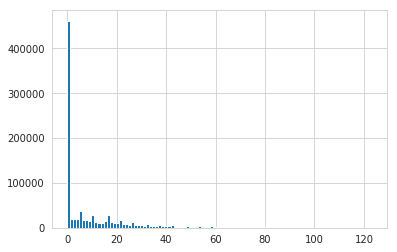

mean :  12.47680848650717
variance  :  420.3077199770125
skewness :  2.3176157397649155
kurtosis :  5.676152113135757

Departure delays (minutes)
count   5611364.00
mean          5.40
std          20.34
min         -82.00
25%          -5.00
50%          -2.00
75%           6.00
max         124.00
Name: DEPARTURE_DELAY, dtype: float64


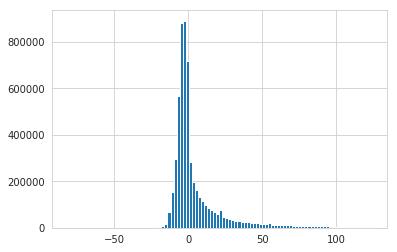

mean :  5.39861645047443
variance  :  413.7022509874646
skewness :  2.820813379195494
kurtosis :  8.916643672767233


In [22]:
#Analyze arrival delay distribution
print('Arrival delays (minutes)')
print(df['AIRLINE_DELAY'].describe())
plt.hist(df['AIRLINE_DELAY'], bins=100)
plt.show()

print("mean : ", np.mean(df['AIRLINE_DELAY']))
print("variance  : ", np.var(df['AIRLINE_DELAY']))
print("skewness : ",df['AIRLINE_DELAY'].skew())
print("kurtosis : ",df['AIRLINE_DELAY'].kurtosis())
print('')

print('Departure delays (minutes)')
print(df['DEPARTURE_DELAY'].describe())
plt.hist(df['DEPARTURE_DELAY'], bins=100)
plt.show()

print("mean : ", np.mean(df['DEPARTURE_DELAY']))
print("variance  : ", np.var(df['DEPARTURE_DELAY']))
print("skewness : ",df['DEPARTURE_DELAY'].skew())
print("kurtosis : ",df['DEPARTURE_DELAY'].kurtosis())

##### Conclusion: The arrival and departure delay data is highly positively skewed with heavy outliers 

### 2.2. Categorical

Weather                48538
Airline                25008
National Air System    15702
Security                  22
Name: CANCELLATION_REASON, dtype: int64


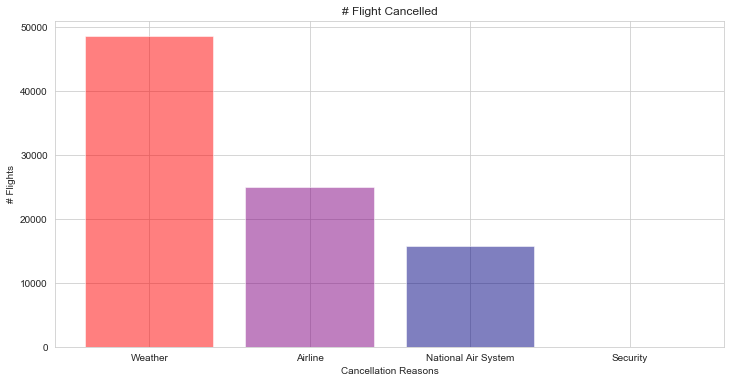

In [7]:
print(df['CANCELLATION_REASON'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# Flight Cancelled')
plt.xlabel('Cancellation Reasons')
plt.ylabel('# Flights')

labels = df['CANCELLATION_REASON'].value_counts().index
values = df['CANCELLATION_REASON'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5, color=['red','purple','navy','gray'])
plt.xticks(y_pos, labels)

plt.show()

#### Conclusion: 'Weather' is the main reason of flight cancellation.

## 3. Multiple Variables

### 3.1. Numeric X Numeric

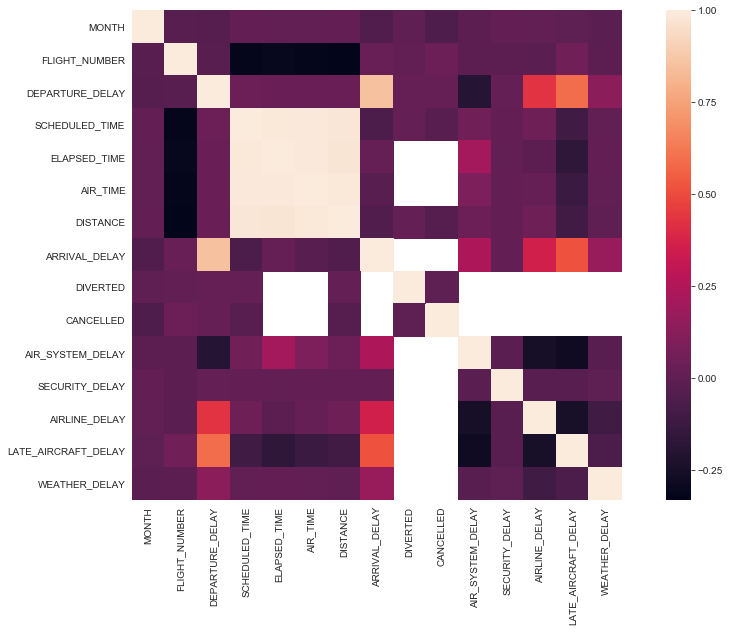

In [3]:
#Correlation

correlation_matrix = df.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, square=True)
plt.show()


### 3.2. Numeric X Categorical

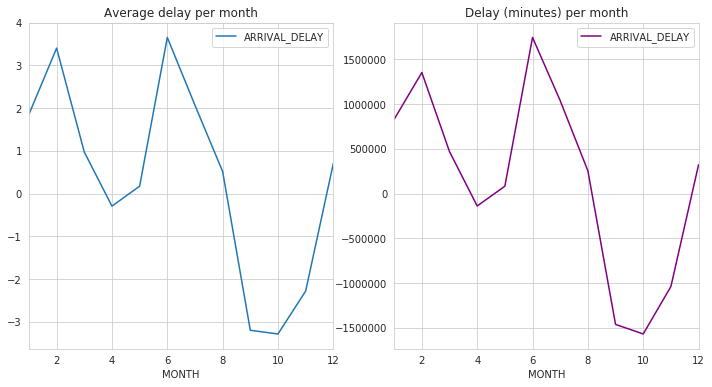

In [84]:
# Linechart of arrival delay distribution by month 
f,ax=plt.subplots(1,2,figsize=(12,6))

df[['MONTH','ARRIVAL_DELAY']].groupby(['MONTH']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay per month')

df[['MONTH','ARRIVAL_DELAY']].groupby(['MONTH']).sum().plot(ax=ax[1],color=['purple'])
ax[1].set_title('Delay (minutes) per month')
plt.show()

###### Conclusion: April has the lowest average arrival delays and June has highest 

## 4. Business Prespective

### 4.1. What is the average delay for different airlines ?

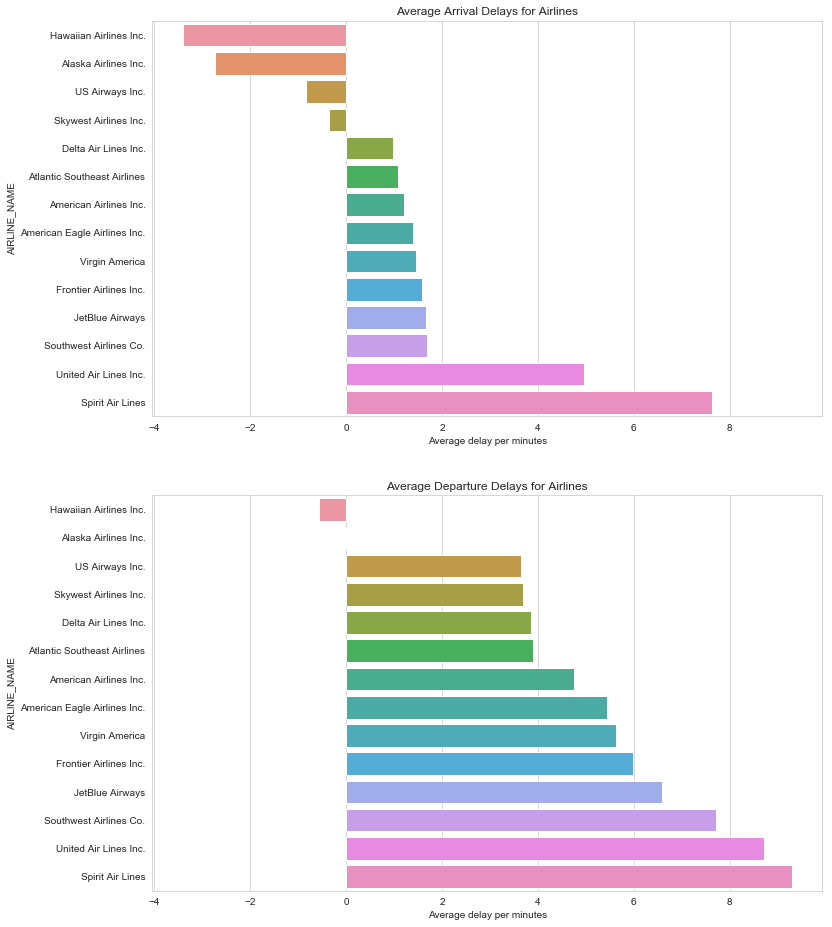

In [10]:

airline_arr_group = df.groupby('AIRLINE_NAME')['ARRIVAL_DELAY'].mean().sort_values()
airline_dep_group = df.groupby('AIRLINE_NAME')['DEPARTURE_DELAY'].mean().sort_values()

#Plotting

fig = plt.figure(figsize=(12, 16))
ax1 = plt.subplot(211)

plt.title('Average Arrival Delays for Airlines')
plt.xlabel('Average delay per minutes')
plt.ylabel('Airlines Names')
sns.barplot(x=airline_arr_group.values, y=airline_arr_group.index, orient='h')

ax2 = plt.subplot(212, sharex = ax1, sharey = ax1)

plt.title('Average Departure Delays for Airlines')
plt.xlabel('Average delay per minutes')
plt.ylabel('Airlines Names')
sns.barplot(x=airline_dep_group.values, y=airline_dep_group.index, orient='h')

plt.show()

### 4.2. What is the average arrival and departure delay times based on airport ?

In [103]:
print(df.groupby(by='DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean().round().sort_values())
print('')
print(df.groupby(by='ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().round().sort_values())

DESTINATION_AIRPORT
Valdez Airport                                               -14.00
Canyonlands Field                                            -12.00
Ford Airport                                                  -9.00
Lewiston-Nez Perce County Airport                             -8.00
Bellingham International Airport                              -8.00
Falls International Airport                                   -8.00
Brainerd Lakes Regional Airport                               -7.00
Bert Mooney Airport                                           -6.00
Rock Springs-Sweetwater County Airport                        -5.00
Hays Regional Airport                                         -5.00
Bemidji Regional Airport                                      -5.00
Devils Lake Regional Airport                                  -5.00
Laramie Regional Airport                                      -5.00
Rhinelander-Oneida County Airport                             -5.00
Dillingham Airport          

##### Conclusion: Flight arriving and departing from Valdez Airport have the highest average delays

### 4.3. What is the impact of the weather on flights?

MONTH
9      2060
10     2434
4      4458
11     4567
7      4764
8      5015
5      5632
12     7992
6      9034
3     10950
1     11938
2     20426
Name: CANCELLED, dtype: int64


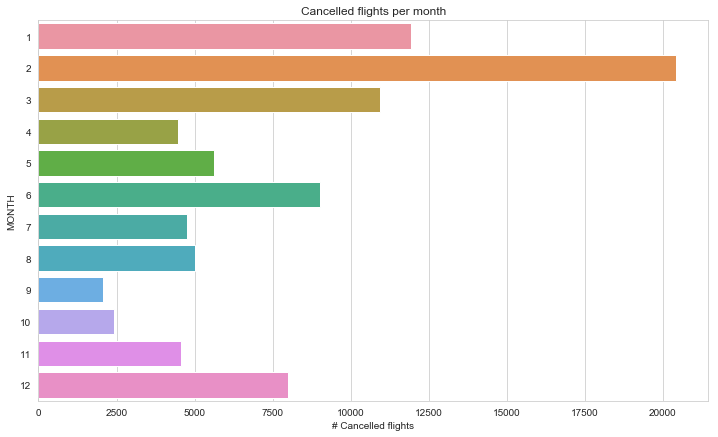

In [31]:
#As discussed above, weather is the most common reason for cancellation.
#For more illustration:

month_cancel_group = df.groupby('MONTH')['CANCELLED'].sum().sort_values()
print(month_cancel_group)

plt.figure(figsize=(12,7))

plt.title('Cancelled flights per month')
plt.xlabel('# Cancelled flights')
plt.ylabel('Month')
sns.barplot(x=month_cancel_group.values, y=month_cancel_group.index, orient='h')

plt.show()

#### Feb has the higher number of cancelled flights, then Jan and March - Winter.